## Numerical Testing

In [1]:
from helper import obmat, obvec, intvec, exp, log, sin, cos, tan, sqrt
from bounding import optimal_centerd_forms
from solver import improved_BandB
import cProfile
import pstats
from pstats import SortKey
from analyzing import iterations_in_decision_space_plot, iterations_in_objective_space_plot
from pyinterval import interval
import numpy as np

### TP1 - multiple global edge solutions

#### Setting up the optimization problem

In [35]:
def func(x):
    return x[0] + x[1]

def grad(x):
    return obvec([1,1])

def cons(x):
    return obvec([-(x[0]**2 +x[1]**2) +4,-x[0] +x[1] -2,x[0] -x[1] -2,x[0]**2 +x[1]**2 -9])

def cons_div(x):
    return obmat([[-2*x[0],-1,1,2*x[0]],[-2*x[1],1,-1,2*x[1]]])

X = intvec([[0,3],[0,3]])

#### Applying the solver to the optimization problem

In [36]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, grad, cons, cons_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP1_stats")

#### Outprinting the solver run statistics

In [37]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP1_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 97
Wed Jan  8 12:21:16 2025    /Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP1_stats

         4548758 function calls (4402758 primitive calls) in 3.670 seconds

   Ordered by: cumulative time
   List reduced from 120 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.009    0.009    3.712    3.712 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
    80850    0.391    0.000    2.652    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
      690    0.005    0.000    2.609    0.004 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:17(bounding_omega)
     3489    0.048    0.000    2.582    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
60385/32785    0.062    0.000    2.364    0.00

#### Checking for inclusion of the solution set

In [38]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (0,2), s2 = (2,0)")
print("Inclusion hold:",any((0 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((2 in Bi[0]) & (0 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (0,2), s2 = (2,0)
Inclusion hold: True , True


#### Plotting the solver approximation process

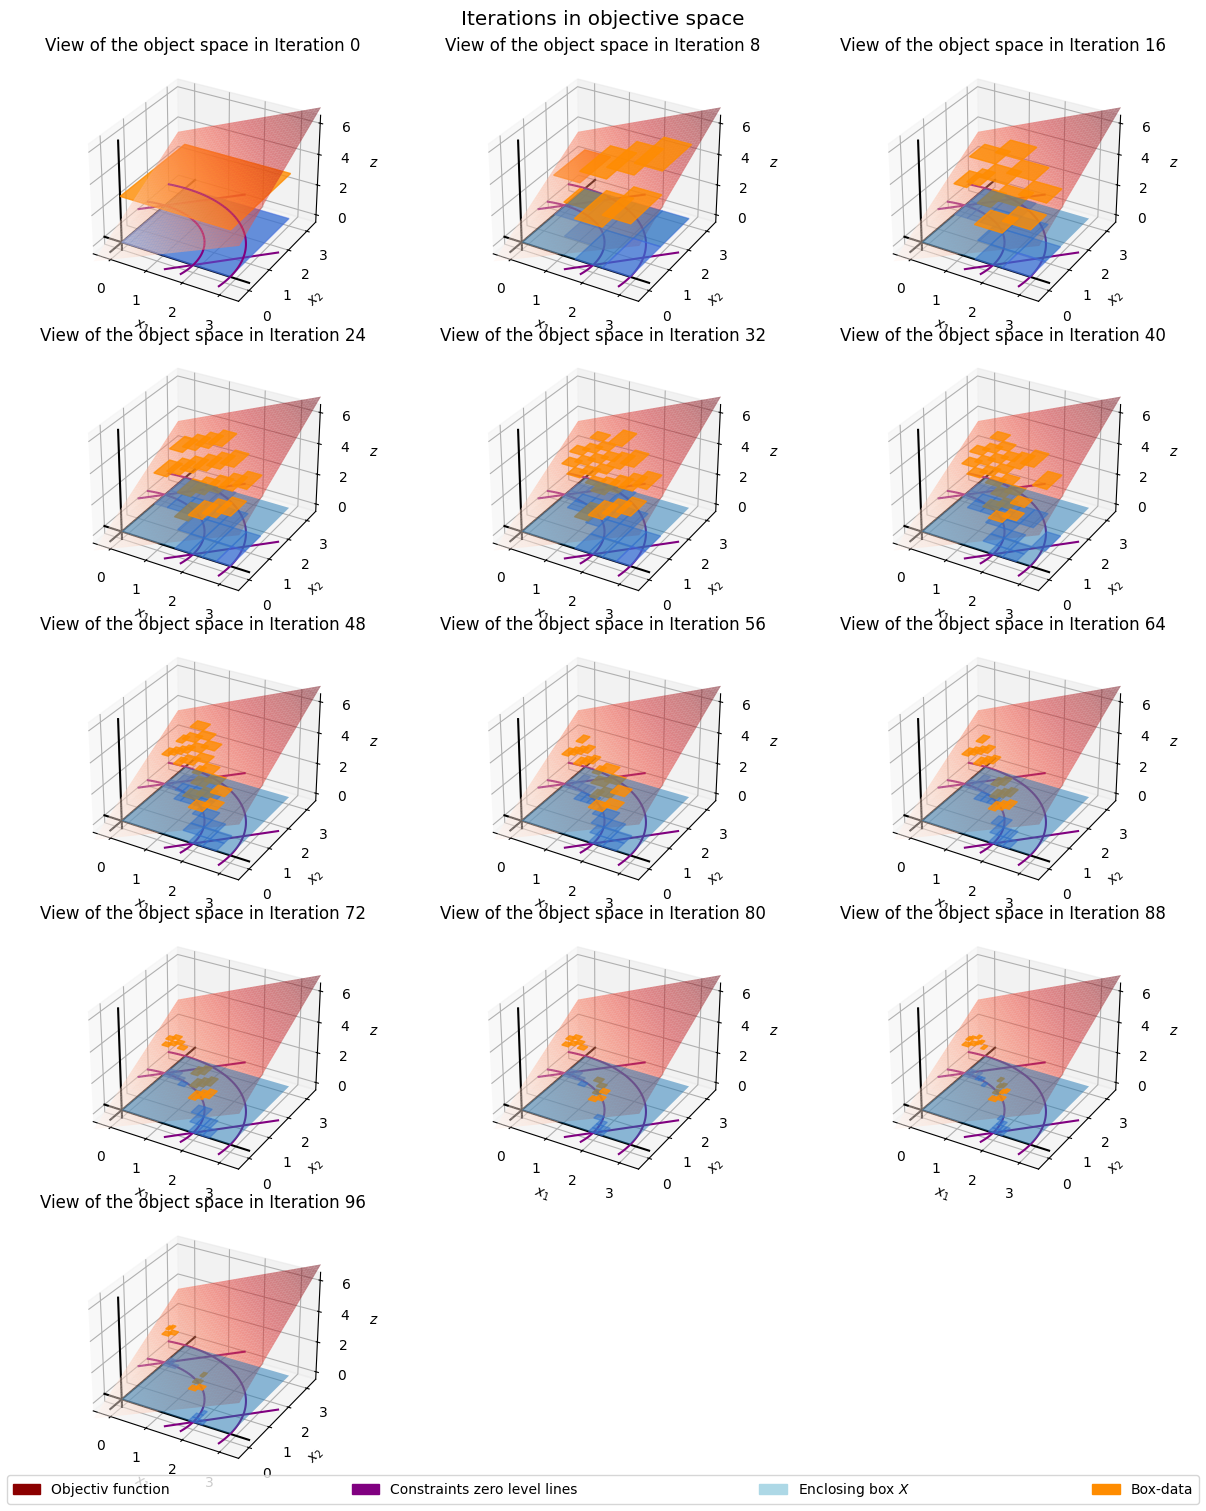

In [42]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations_in_objective_space_plot(func,grad,cons,X,data_X,list(data_X.keys())[::round(k/12)],figsize=(12,15),facecolor="white")

### TP2 - multiple global edge solutions

#### Setting up the optimization problem

In [7]:
def func(x):
    return -0.5*((x[0]-2)**2+(x[1]-2)**2)**3 +2*((x[0]-2)**2+(x[1]-2)**2)**2

def grad(x):
    return obvec([-3*(x[0]-2)*((x[0]-2)**2+(x[1]-2)**2)**2 +8*(x[0]-2)*((x[0]-2)**2+(x[1]-2)**2),-3*(x[1]-2)*((x[0]-2)**2+(x[1]-2)**2)**2 +8*(x[1]-2)*((x[0]-2)**2+(x[1]-2)**2)])

def cons(x):
    return obvec([(x[0]-3)**3 -3 +x[1],-x[0] +x[1] -2,x[0] -x[1] -2,-log((x[0]+0.5)*(x[1]+0.5))+1])

def cons_div(x):
    return obmat([[3*(x[0]-3)**2,-1,1,-1/(x[0]+0.5)],[1,1,-1,-1/(x[1]+0.5)]])

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [8]:
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, grad, cons, cons_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")

#### Outprinting the solver run statistics

In [9]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 467
Tue Jan  7 19:51:11 2025    /Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP2_stats

         40551132 function calls (39193254 primitive calls) in 21.207 seconds

   Ordered by: cumulative time
   List reduced from 140 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.026    0.026   21.436   21.436 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
   916384    2.573    0.000   15.889    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    14111    0.124    0.000   13.639    0.001 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
   916384    1.120    0.000   12.472    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:162(<listcomp>)
   406006    0.353 

#### Checking for inclusion of the solution set

In [10]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (2,2), s2 = (4,2), s3 = (2,4)")
print("Inclusion hold:",any((2 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((4 in Bi[0]) & (2 in Bi[1]) for Bi in solution_Boxes),",",any((2 in Bi[0]) & (4 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (2,2), s2 = (4,2), s3 = (2,4)
Inclusion hold: True , True , True


#### Plotting the solver approximation process

/Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/helper.py:403: RuntimeWarning: divide by zero encountered in log
  return imath.log(x) if isinstance(x,interval) else np.log(x)


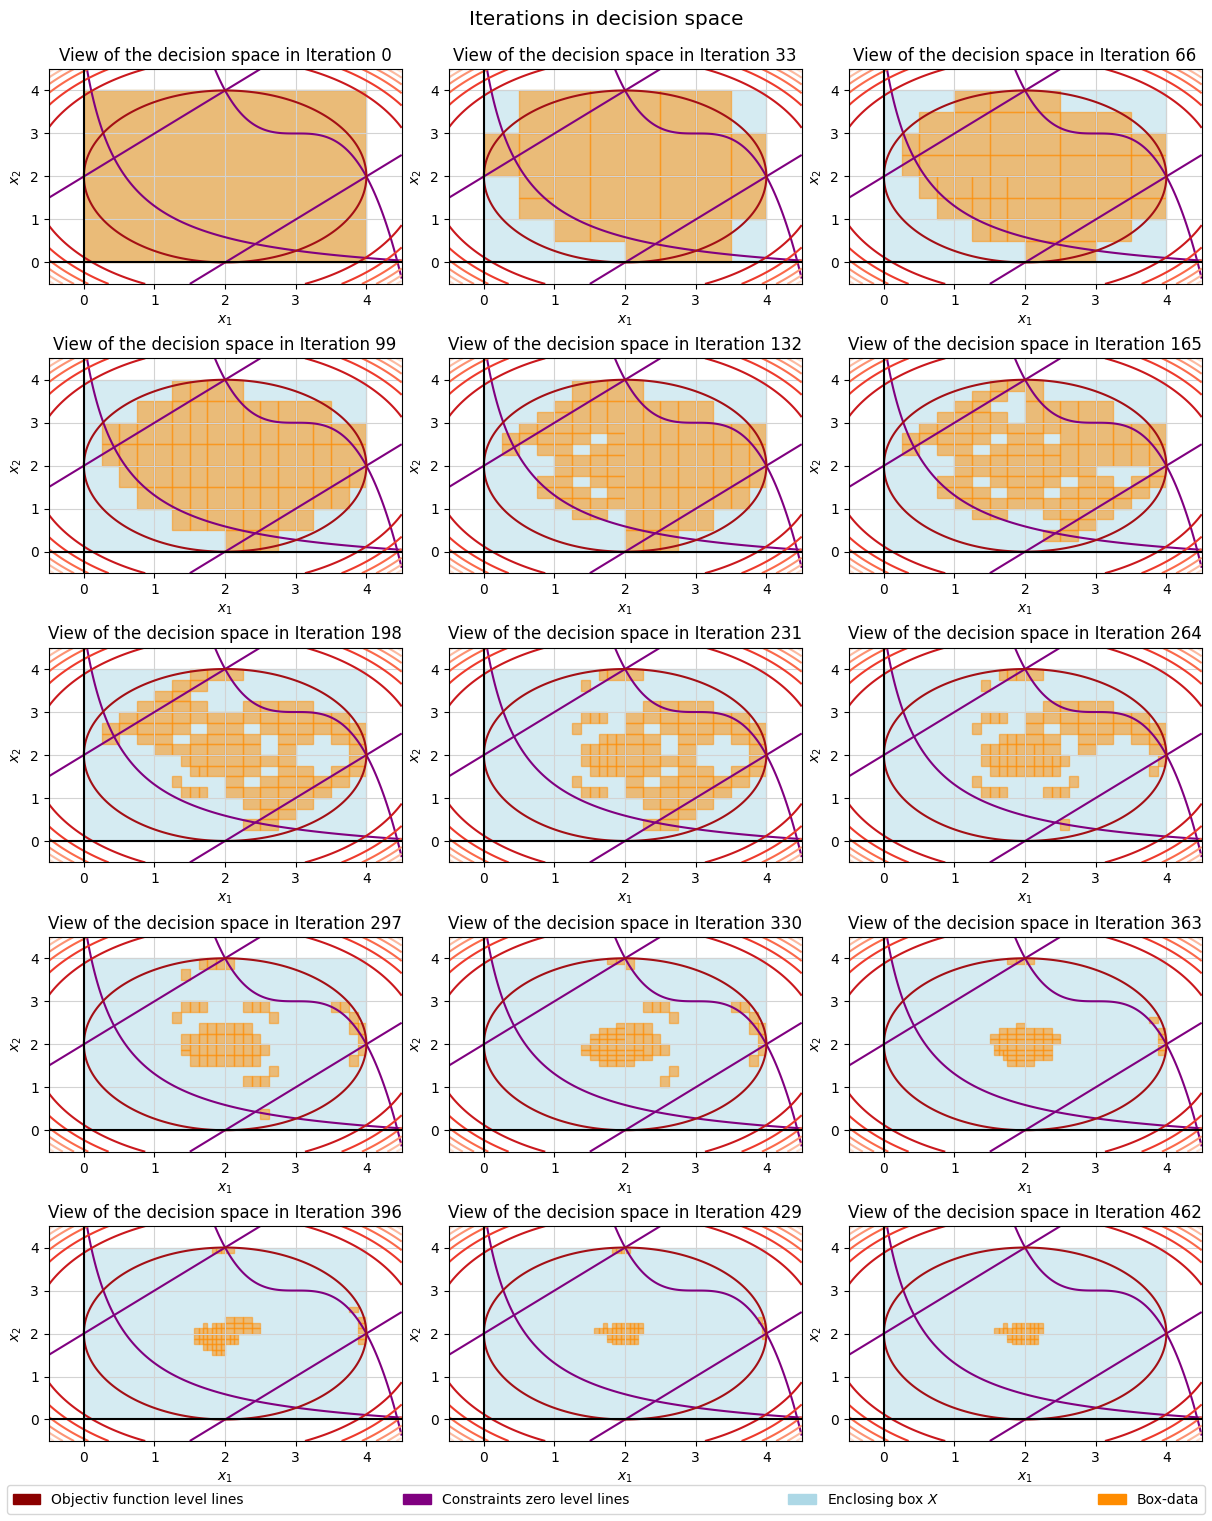

In [11]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations_in_decision_space_plot(func,cons,X,data_X,list(data_X.keys())[::round(k/14)],figsize=(12,15),facecolor="white")

In [12]:
any((4 in Bi[0]) & (2 in Bi[1]) for Bi in [s[0] for s in solution])
#[s[0] for s in solution]

True

### TP3 - local minimum (and MFC violated) 

#### Setting up the optimization problem

In [13]:
def func(x):
    return - x[0]**2 - x[1]**2

def grad(x):
    return obvec([-2*x[0],-2*x[1]])

def cons(x):
    return obvec([(x[0]-2)**2 + (x[1]-1)**2 -4,(-1/3)*(x[1]-4)**2 +x[0],-x[1] +1])

def cons_div(x):
    return obmat([[2*(x[0]-2),1,0],[2*(x[1]-1),(-2/3)*(x[1]-4),-1]])

# def cons(x):
#     return obvec([(x[0]-2)**2 + (x[1]-1)**2 -4,(1/9)*(x[0]-3)**3 -1 +x[1],-x[1] +1])

# def cons_div(x):
#     return obmat([[2*(x[0]-2),(1/3)*(x[0]-3)**2,0],[2*(x[1]-1),1,-1]])

X = intvec([[0,4],[0,4]])

#### Applying the solver to the optimization problem

In [14]:
#limiting the iterations to 2500
with cProfile.Profile() as pr:
    solution, k, save = improved_BandB(func, grad, cons, cons_div, X, bounding_procedure = optimal_centerd_forms, epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP3_stats")

#### Outprinting the solver run statistics

In [15]:
print("Iterations needed/done:",k)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP3_stats")
ps = pstats.Stats(pr)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 1723
Tue Jan  7 19:54:41 2025    /Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP3_stats

         430825511 function calls (400184549 primitive calls) in 204.323 seconds

   Ordered by: cumulative time
   List reduced from 122 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.102    0.102  204.811  204.811 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
     5157    3.728    0.001  170.137    0.033 {method 'remove' of 'list' objects}
  5017567    7.368    0.000  168.905    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/helper.py:8(wrapper)
  5175895    2.596    0.000  160.937    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/helper.py:366(__new__)
38705874/8354300   12.138    0.000  159.894    0.000 {built-in method __new__ of type object at 0x105bd9ae8}
 15429009   11.388    0.000  153

#### Checking for inclusion of the solution set

In [16]:
solution_Boxes = [Oi[0] for Oi in solution]
print("The optimal solution: s1 = (3,1)")
print("Inclusion hold:",any((3 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes))
print("The local solution: l1 = (0.7165,2.5339)")
print("Inclusion hold:",any((0.7165 in Bi[0])&(2.5339 in Bi[1]) for Bi in solution_Boxes))

The optimal solution: s1 = (3,1)
Inclusion hold: True
The local solution: l1 = (0.7165,2.5339)
Inclusion hold: False


#### Plotting the solver approximation process

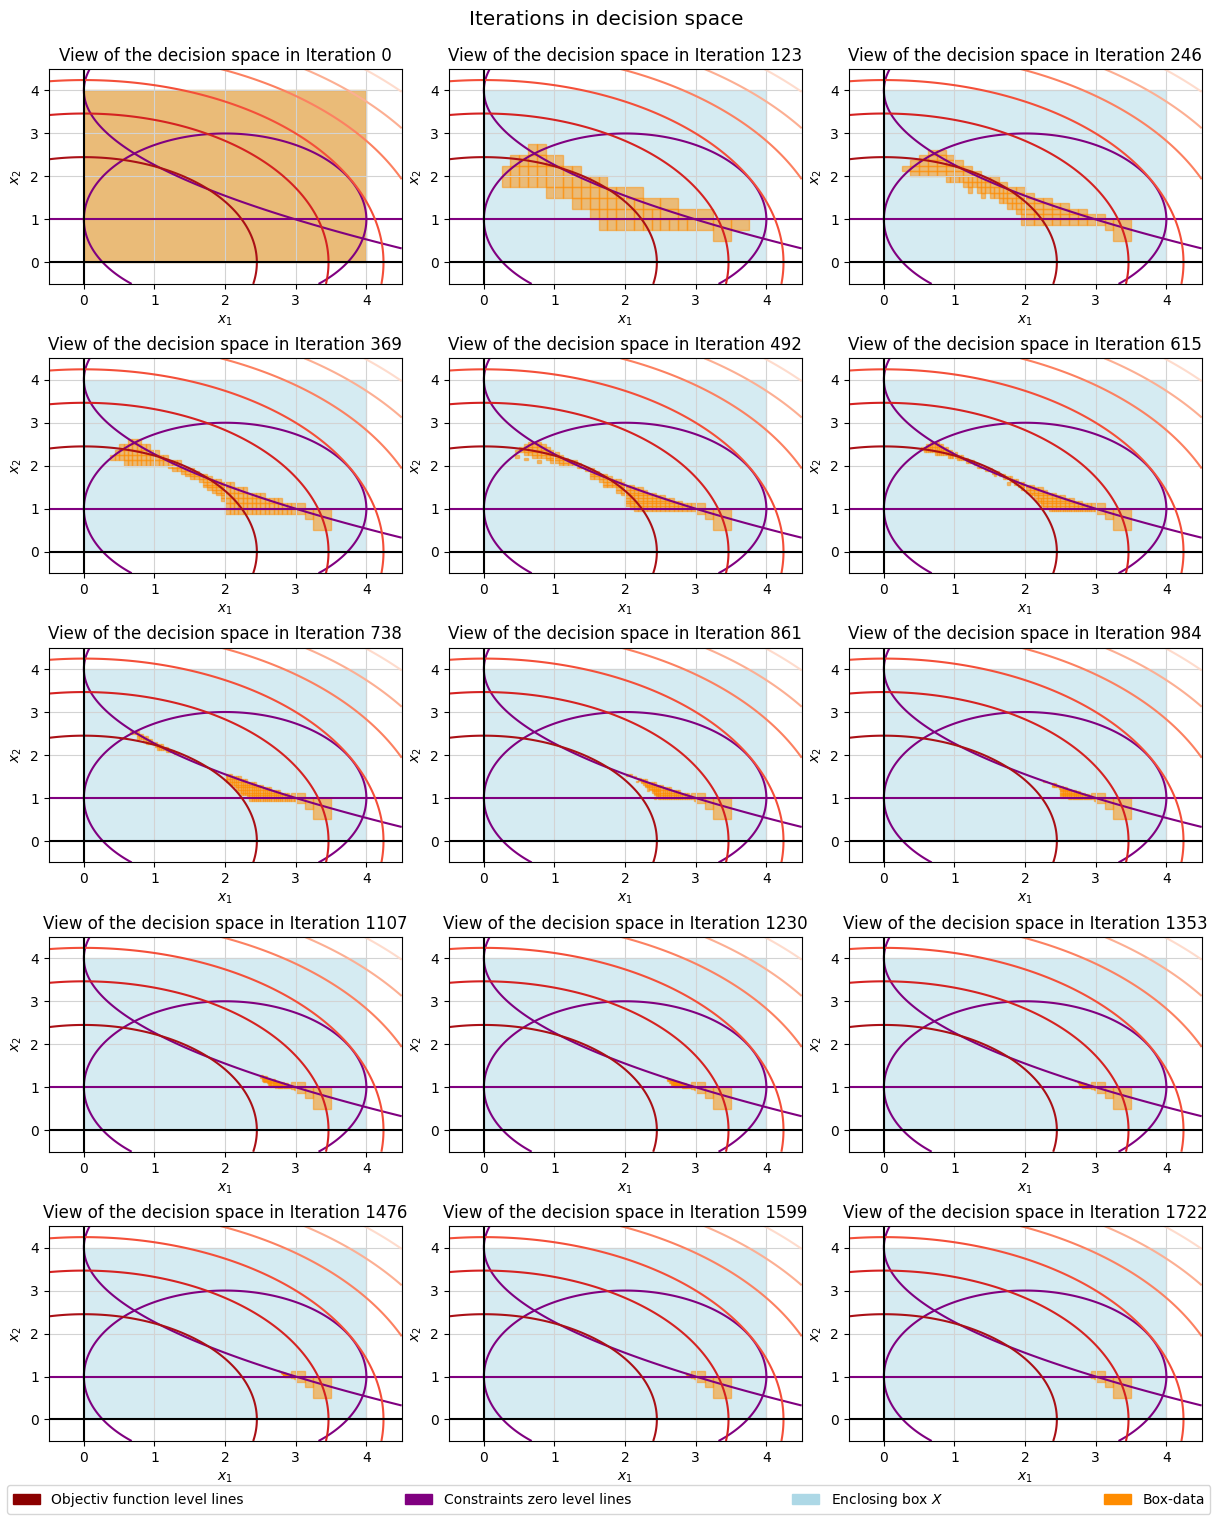

In [17]:
data_X = dict(zip(save.keys(),[[Oi[0] for Oi in save[k][0]] for k in save]))
iterations_in_decision_space_plot(func,cons,X,data_X,list(data_X.keys())[::round(k/14)],figsize=(12,15),facecolor="white")

### TP4 - De Jong testfunctions (no constraints) 

#### Setting up the optimization problem

In [18]:
def func2(x):
    return 100 *(x[0]**2 -x[1])**2 +(1 -x[0])**2

def grad2(x):
    return obvec([400 *(x[0]**2 -x[1]) *x[0] -2 *(1 -x[0]), -200 *(x[0]**2 -x[1])])

X2 = intvec([[-2,2],[-2,2]])

def func5(x):
    #a = obmat([[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]])
    m, k = 9, 10
    a = obmat([[-9,0,9,-9,0,9,-9,0,9],[-9,-9,-9,0,0,0,9,9,9]])
    return 1/((1/k) +sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2))) for j in range(m)))

def grad5(x):
    #a = obmat([[-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32,-32,-16,0,16,32],[-32,-32,-32,-32,-32,-16,-16,-16,-16,-16,0,0,0,0,0,16,16,16,16,16,32,32,32,32,32]])
    m = 9
    a = obmat([[-9,0,9,-9,0,9,-9,0,9],[-9,-9,-9,0,0,0,9,9,9]])
    return obvec([1/(-sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2)))**2 *(6 *(x[0] -a[0][j])**5) for j in range(m))),1/(-sum(1/((1+j) +sum((x[i] -a[i][j])**6 for i in range(2)))**2 *(6 *(x[1] -a[1][j])**5) for j in range(m)))])

X5 = intvec([[-10,10],[-10,10]])

def cons(x,x_inf, x_sup):
    return obvec([x[0]-x_sup[0], x[1]-x_sup[1],x_inf[0]-x[0],x_inf[1]-x[1]])

def cons_div(x,x_inf, x_sup):
    return obmat([[1,0,-1,0],[0,1,0,-1]])

#### Applying the solver to the optimization problem

In [19]:
with cProfile.Profile() as pr2:
    solution2, k2, save2 = improved_BandB(func2, grad2, lambda x: cons(x,X2.inf, X2.sup), lambda x: cons_div(x,X2.inf, X2.sup), X2, bounding_procedure = optimal_centerd_forms, 
                                          epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr2.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP42_stats")

In [20]:
with cProfile.Profile() as pr5:
    solution5, k5, save5 = improved_BandB(func5, grad5, lambda x: cons(x,X5.inf, X5.sup), lambda x: cons_div(x,X5.inf, X5.sup), X5, bounding_procedure = optimal_centerd_forms, 
                                          epsilon = 0, delta = 0, epsilon_max = 0.5, delta_max = 0.5, k_max = 2500)

#pr5.dump_stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP45_stats")

#### Outprinting the solver run statistics

In [21]:
print("Iterations needed/done:",k2)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP42_stats")
ps = pstats.Stats(pr2)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 834
Tue Jan  7 19:55:24 2025    /Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP42_stats

         78593898 function calls (73644304 primitive calls) in 37.169 seconds

   Ordered by: cumulative time
   List reduced from 124 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.044    0.044   37.436   37.436 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
   775561    1.142    0.000   26.048    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/helper.py:8(wrapper)
6738944/1831938    2.160    0.000   26.021    0.000 {built-in method __new__ of type object at 0x105bd9ae8}
   861988    0.451    0.000   25.572    0.000 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/helper.py:366(__new__)
     2193    0.531    0.000   25.241    0.012 {method 'remove' of 'list' objects}
  2531270    1.778    0.000   24.307

In [22]:
print("Iterations needed/done:",k5)
#ps = pstats.Stats("/Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP45_stats")
ps = pstats.Stats(pr5)
ps.sort_stats(SortKey.CUMULATIVE).print_stats(10)

Iterations needed/done: 2500
Tue Jan  7 20:00:58 2025    /Users/marcrodestock/Documents/Studium/Master-Arbeit/Algo_Data/TP45_stats

         675083251 function calls (659704652 primitive calls) in 326.918 seconds

   Ordered by: cumulative time
   List reduced from 138 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.191    0.191  334.621  334.621 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/solver.py:7(improved_BandB)
 15232202   40.176    0.000  254.988    0.000 /Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyinterval/__init__.py:159(_canonical)
    89169    0.696    0.000  243.136    0.003 /Users/marcrodestock/Documents/Studium/Master-Arbeit/Python_Code/bounding.py:7(optimal_centerd_forms)
    36906    0.254    0.000  219.252    0.006 /var/folders/qw/q3_1j0v96dq4w7jgvx9zcdxm0000gn/T/ipykernel_37448/2285291051.py:15(grad5)
996102/120717    2.389    0.000  214.563  

#### Checking for inclusion of the solution set

In [27]:
solution_Boxes2 = [Oi[0] for Oi in solution2]
print("The optimal solution of F2: s1 = (1,1)")
print("Inclusion hold:",any((1 in Bi[0]) & (1 in Bi[1]) for Bi in solution_Boxes2))

The optimal solution of F2: s1 = (1,1)
Inclusion hold: True


In [28]:
solution_Boxes5 = [Oi[0] for Oi in solution5]
print("The optimal solution of F5: s1 = (-9,-9)")
print("Inclusion hold:",any((-9 in Bi[0]) & (-9 in Bi[1]) for Bi in solution_Boxes5))

The optimal solution of F5: s1 = (-9,-9)
Inclusion hold: True


#### Plotting the solver approximation process

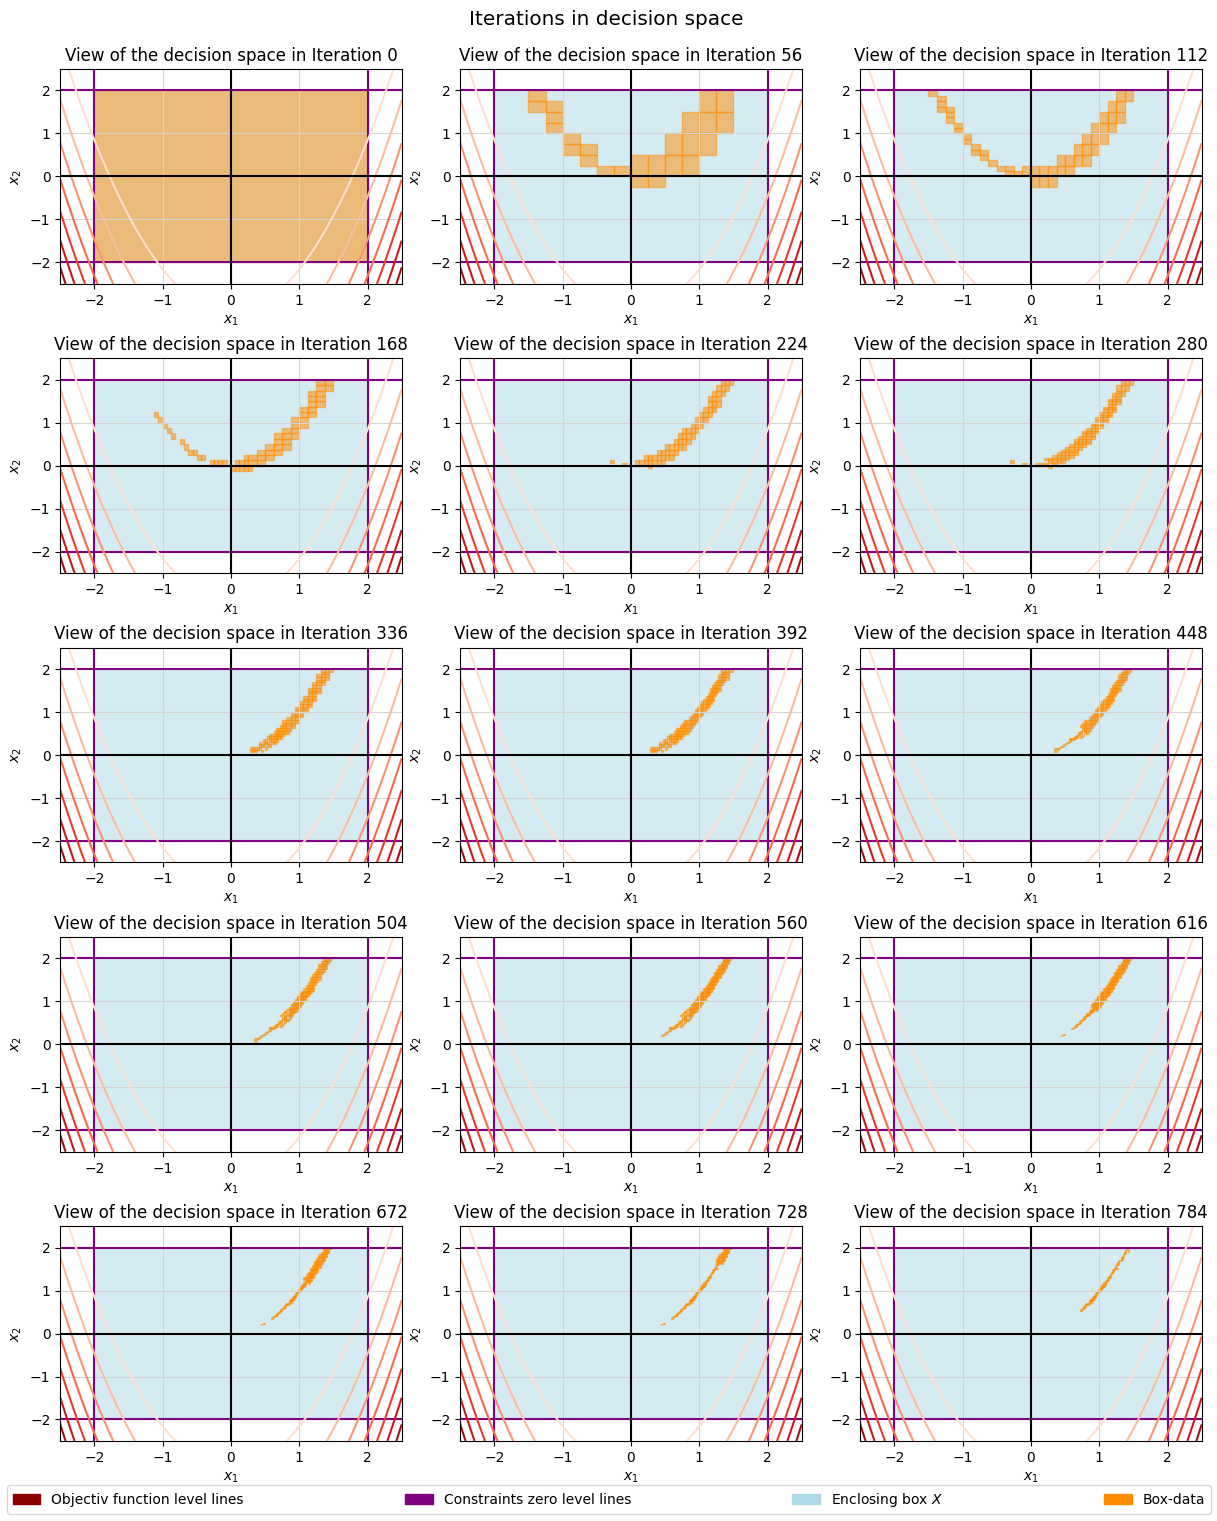

In [25]:
data_X2 = dict(zip(save2.keys(),[[Oi[0] for Oi in save2[k][0]] for k in save2]))
iterations_in_decision_space_plot(func2,lambda x: cons(x,X2.inf,X2.sup),X2,data_X2,list(data_X2.keys())[::round(k2/15)],figsize=(12,15),facecolor="white")

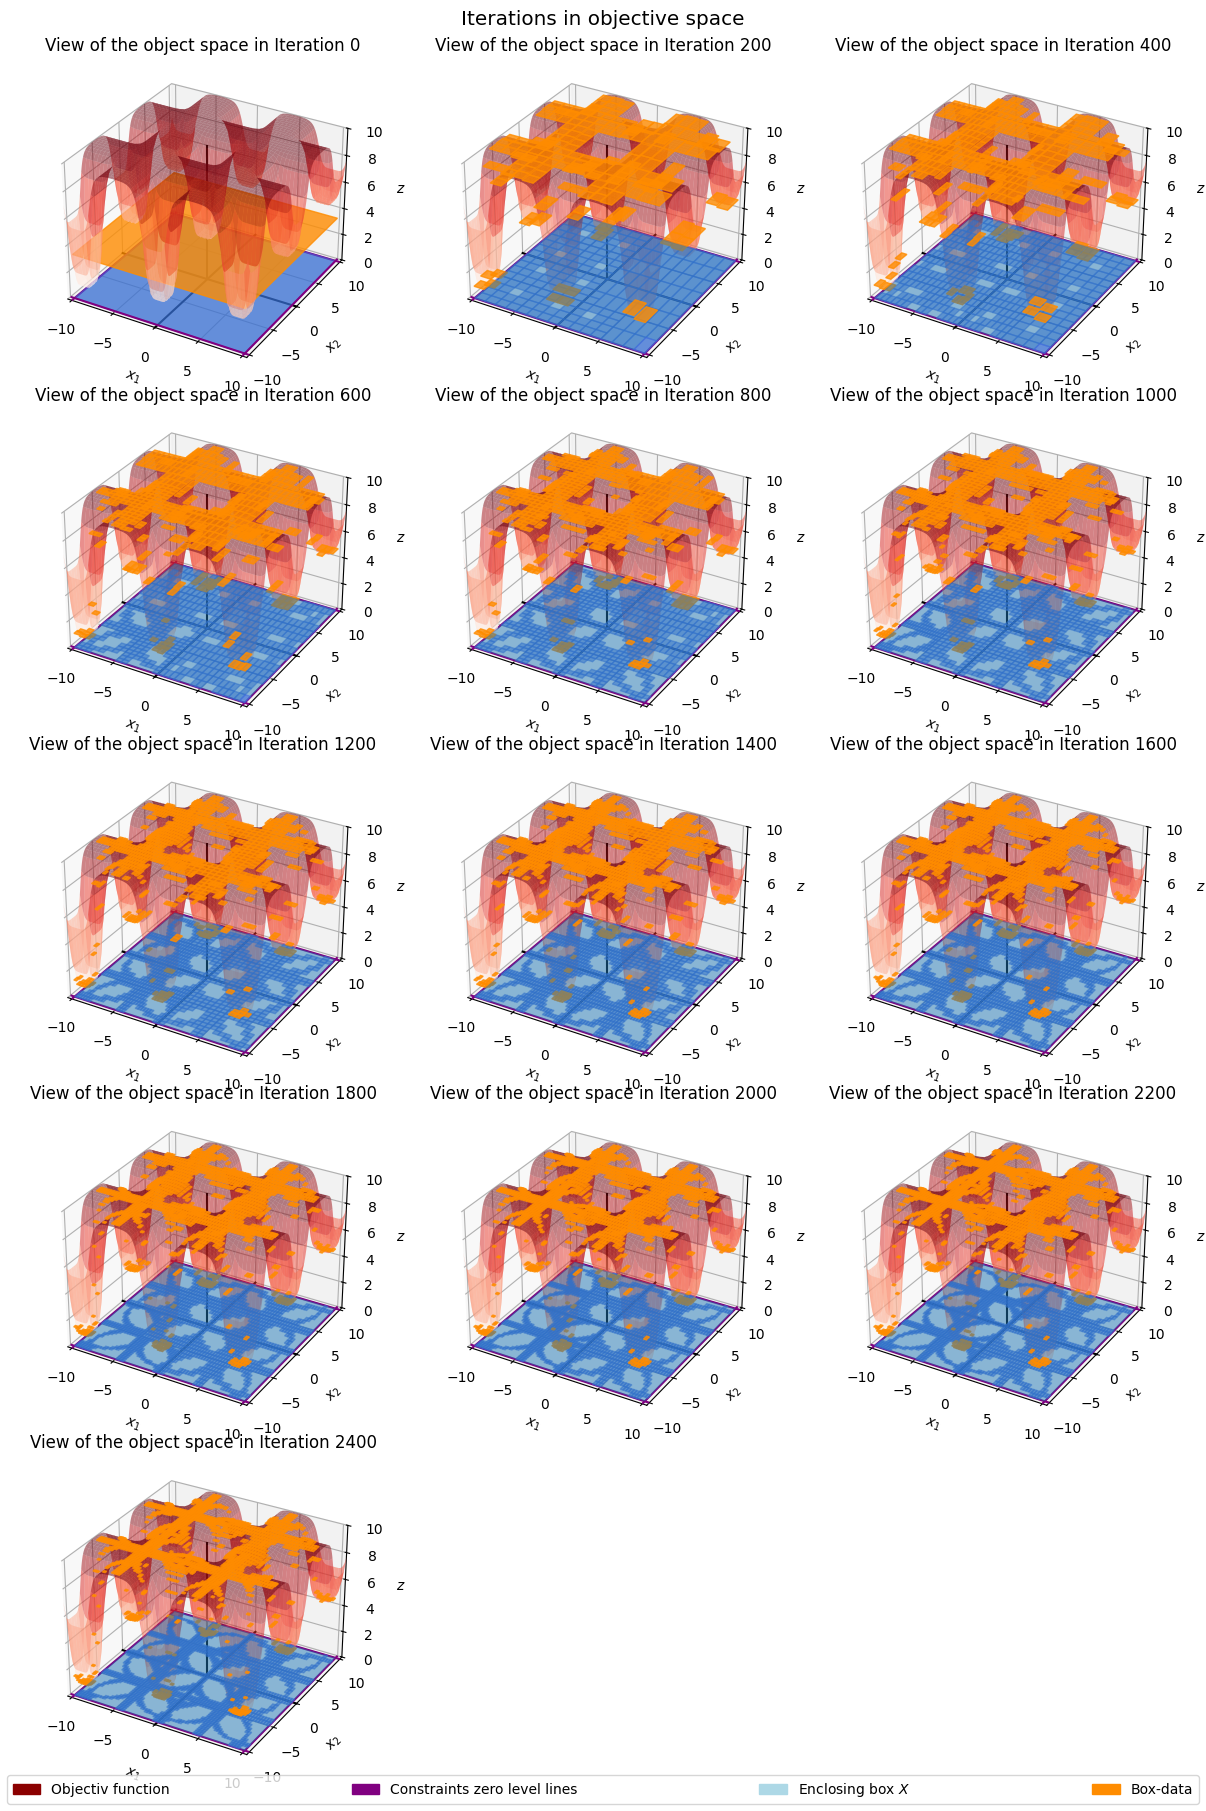

In [26]:
data_X5 = dict(zip(save5.keys(),[[Oi[0] for Oi in save5[k][0]] for k in save5]))
iterations_in_objective_space_plot(func5,None,lambda x: cons(x,X5.inf,X5.sup),X5,data_X5,list(data_X5.keys())[::round(k5/12.5)],xyzlim=[(-10.5,10.5),(-10.5,10.5),(0,10)],figsize=(12,18),facecolor="white")